<a href="https://colab.research.google.com/github/coakfulo/yolov3-channel-and-layer-pruning/blob/master/channel_prueni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!nvidia-smi

Sat Feb 29 09:22:04 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import os
os.chdir("/content/drive/My Drive/visdrone")

In [0]:
!unzip images.zip -d /content/  #解压到根目录

In [0]:
import os
os.chdir("/content/drive/My Drive/SlimYolo")

In [0]:
!unzip labels.zip -d /content/  #解压到根目录

In [7]:
!pip install terminaltables

  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=cf60fb7c7a9a9dac790f1426d9ea8cafd5190141edb544d4c37ebe4122345693
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables


In [0]:
import os
os.chdir("/content/drive/My Drive/SlimYolo/yolov3")

In [0]:
# 基础训练

In [0]:
!python train.py --cfg cfg/yolov3-tiny-visdrone.cfg --data data/visdrone.data --weights weights/yolov3-tiny.pt  --epochs 50 --batch 32 --multi

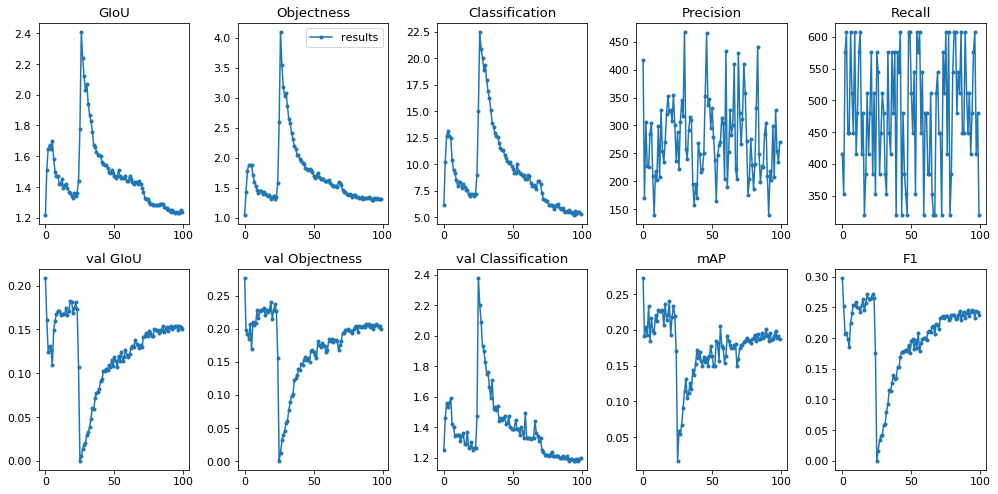

In [14]:
from utils import utils  # 可视化训练过程
utils.plot_results()

In [0]:
!python test.py --cfg cfg/yolov3-spp-visdrone.cfg --weights 训练数据备份/yolov3-spp-100epoch/best.pt --data data/visdrone.data --conf-thres 0.1 --batch-size 16

Namespace(batch_size=16, cfg='cfg/yolov3-spp-visdrone.cfg', conf_thres=0.1, data='data/visdrone.data', device='', img_size=416, iou_thres=0.5, save_json=False, task='test', weights='训练数据备份/yolov3-spp-100epoch/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 35/35 [00:30<00:00,  1.71it/s]
                 all       548  3.88e+04     0.417     0.308     0.232     0.348
         pedestrian        548  8.84e+03     0.542     0.233     0.196     0.326
              people       548  5.12e+03     0.387     0.212     0.141     0.274
             bicycle       548  1.29e+03     0.229     0.113    0.0565     0.151
                car        548  1.41e+04     0.669     0.646     0.598     0.657
                 van       548  1.98e+03     0.447     0.382     0.279     0.412
               truck       548       750     0.371     0.317     0.222     0.342
   

In [0]:
!python test.py --cfg cfg/yolov3-spp-visdrone.cfg --weights 训练数据备份/yolov3-spp-100epoch/last.pt --data data/visdrone.data --conf-thres 0.1 --batch-size 16

Namespace(batch_size=16, cfg='cfg/yolov3-spp-visdrone.cfg', conf_thres=0.1, data='data/visdrone.data', device='', img_size=416, iou_thres=0.5, save_json=False, task='test', weights='训练数据备份/yolov3-spp-100epoch/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 35/35 [00:30<00:00,  1.75it/s]
                 all       548  3.88e+04      0.47     0.291     0.225     0.353
         pedestrian        548  8.84e+03     0.534     0.229     0.186      0.32
              people       548  5.12e+03     0.432     0.202     0.137     0.275
             bicycle       548  1.29e+03      0.29    0.0971     0.052     0.146
                car        548  1.41e+04     0.702     0.638      0.59     0.669
                 van       548  1.98e+03     0.481     0.352     0.253     0.406
               truck       548       750     0.459     0.291     0.217     0.356
   

In [0]:
!python test.py --cfg cfg/yolov3-visdrone.cfg --weights 训练数据备份/yolov3-90epoch/backup90.pt --data data/visdrone.data --conf-thres 0.1 --batch-size 16

Namespace(batch_size=16, cfg='cfg/yolov3-visdrone.cfg', conf_thres=0.1, data='data/visdrone.data', device='', img_size=416, iou_thres=0.5, save_json=False, task='test', weights='训练数据备份/yolov3-90epoch/backup90.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 35/35 [00:31<00:00,  1.68it/s]
                 all       548  3.88e+04     0.444     0.307     0.234     0.359
         pedestrian        548  8.84e+03     0.496     0.241     0.199     0.324
              people       548  5.12e+03     0.421     0.196     0.131     0.268
             bicycle       548  1.29e+03     0.199     0.112    0.0442     0.143
                car        548  1.41e+04     0.725     0.644       0.6     0.682
                 van       548  1.98e+03     0.427     0.395     0.284      0.41
               truck       548       750     0.425     0.312     0.232      0.36
        

In [0]:
!python test.py --cfg cfg/yolov3-tiny-visdrone.cfg --weights 训练数据备份/tinytolov3-50epoch/best.pt --data data/visdrone.data --conf-thres 0.1 --batch-size 16

Namespace(batch_size=16, cfg='cfg/yolov3-tiny-visdrone.cfg', conf_thres=0.1, data='data/visdrone.data', device='', img_size=416, iou_thres=0.5, save_json=False, task='test', weights='训练数据备份/tinytolov3-50epoch/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 35/35 [00:17<00:00,  2.04it/s]
                 all       548  3.88e+04     0.323     0.097    0.0728     0.141
         pedestrian        548  8.84e+03     0.327    0.0308    0.0205    0.0562
              people       548  5.12e+03     0.282    0.0146   0.00855    0.0278
             bicycle       548  1.29e+03    0.0635   0.00311  0.000833   0.00593
                car        548  1.41e+04     0.602     0.301     0.268     0.401
                 van       548  1.98e+03     0.354     0.149       0.1      0.21
               truck       548       750      0.35     0.123    0.0843     0.182
   

In [0]:
import os
os.chdir("/content/drive/My Drive/puring_yolo/yolov3-channel-and-layer-pruning")

In [0]:
# 转换基础训练模型到darknet模型

In [0]:
!python -c "from models import *; convert('cfg/yolov3-spp-visdrone.cfg', 'weights/yolov3-spp-visdrone-best.pt')"

Success: converted 'weights/yolov3-spp-visdrone-best.pt' to 'converted.weights'


In [0]:
# 开启稀疏训练

In [0]:
!python train.py --cfg cfg/yolov3-spp-visdrone.cfg --multi-scale --data data/visdrone.data --weights weights/last.pt --batch-size 12 --epochs 120 -sr --s 0.0001 --prune 1

Namespace(accumulate=2, adam=False, arc='defaultpw', batch_size=12, bucket='', cache_images=False, cfg='cfg/yolov3-spp-visdrone.cfg', data='data/visdrone.data', device='', epochs=120, evolve=False, img_size=416, img_weights=False, multi_scale=True, name='', nosave=False, notest=False, prebias=False, prune=1, rect=False, resume=False, s=0.0001, sr=True, t_cfg='', t_weights='', transfer=False, var=None, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Using multi-scale 320 - 608
loaded weights from weights/last.pt 

shortcut sparse training
Reading labels (8081 found, 0 missing, 0 empty for 8081 images): 100% 8081/8081 [00:01<00:00, 6103.74it/s]
Model Summary: 225 layers, 6.26218e+07 parameters, 6.26218e+07 gradients
Starting training for 120 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total      soft    rratio   targets  img_size
  0% 0/674 [00:00<?, ?it/s]learning rate: 0.0002324
   108/119    

In [13]:
!python test.py --cfg cfg/yolov3-spp-visdrone.cfg --weights weights/backup90.pt --data data/visdrone.data --conf-thres 0.1 --batch-size 16

Namespace(batch_size=16, cfg='cfg/yolov3-spp-visdrone.cfg', conf_thres=0.1, data='data/visdrone.data', device='', img_size=416, iou_thres=0.5, nms_thres=0.5, save_json=False, weights='weights/backup90.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

               Class    Images   Targets         P         R       mAP        F1: 100% 35/35 [01:39<00:00,  2.20s/it]
                 all       548  3.88e+04     0.193     0.241     0.153     0.207
         pedestrian        548  8.84e+03     0.155     0.197     0.113     0.174
              people       548  5.12e+03     0.236     0.148    0.0793     0.182
             bicycle       548  1.29e+03    0.0729    0.0785    0.0194    0.0756
                car        548  1.41e+04     0.434     0.562     0.494      0.49
                 van       548  1.98e+03     0.326     0.236     0.177     0.274
               truck       548       750     0.118     0.253     0.134     0.161
            tric

In [0]:
# 开始剪枝

In [0]:
!python slim_prune.py --cfg cfg/visdrone-spp.cfg --data data/visdrone.data --weights weights/last.pt --global_percent 0.9 --layer_keep 0.01

In [0]:
# 剪层

In [0]:
!tensorboard --logdir runs

In [0]:
!python layer_prune.py --cfg cfg/prune_0.9_keep_0.01_visdrone-spp.cfg --data data/visdrone.data --weights weights/prune_0.9_keep_0.01_last.weights --shortcuts 16

Namespace(cfg='cfg/prune_0.9_keep_0.01_visdrone-spp.cfg', data='data/visdrone.data', img_size=416, shortcuts=16, weights='weights/prune_0.9_keep_0.01_last.weights')

loaded weights from  weights/prune_0.9_keep_0.01_last.weights

let's test the original model first:
               Class    Images   Targets         P         R       mAP        F1: 100% 35/35 [02:30<00:00,  3.16s/it]
                 all       548  3.88e+04    0.0543     0.153    0.0825    0.0699
all shortcut_idx: [4, 8, 11, 15, 18, 21, 24, 27, 30, 33, 36, 40, 43, 46, 49, 52, 55, 58, 61, 65, 68, 71, 74]
These shortcut layers and corresponding CBL will be pruned : [50, 51, 52, 56, 57, 58, 59, 60, 61, 47, 48, 49, 53, 54, 55, 44, 45, 46, 13, 14, 15, 16, 17, 18, 69, 70, 71, 63, 64, 65, 66, 67, 68, 72, 73, 74, 34, 35, 36, 31, 32, 33, 38, 39, 40, 25, 26, 27]
               Class    Images   Targets         P         R       mAP        F1: 100% 35/35 [02:29<00:00,  3.20s/it]
                 all       548  3.88e+04     0.055    

In [0]:
# 微调恢复精度

In [0]:
!python train.py --adam --cfg cfg/prune_16_shortcut_prune_0.9_keep_0.01_visdrone-spp.cfg --data data/visdrone.data --weights weights/prune_16_shortcut_prune_0.9_keep_0.01_last.weights --batch-size 20 --epochs 100  --t_cfg cfg/visdrone-spp.cfg --t_weights weights/last.pt

Namespace(accumulate=2, adam=True, arc='defaultpw', batch_size=20, bucket='', cache_images=False, cfg='cfg/prune_16_shortcut_prune_0.9_keep_0.01_visdrone-spp.cfg', data='data/visdrone.data', device='', epochs=100, evolve=False, img_size=416, img_weights=False, multi_scale=False, name='', nosave=False, notest=False, prebias=False, prune=1, rect=False, resume=False, s=0.001, sr=False, t_cfg='cfg/visdrone-spp.cfg', t_weights='weights/last.pt', transfer=False, var=None, weights='weights/prune_16_shortcut_prune_0.9_keep_0.01_last.weights')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

loaded weights from weights/prune_16_shortcut_prune_0.9_keep_0.01_last.weights 

<.....................using knowledge distillation.......................>
teacher model: weights/last.pt 

Reading labels (8081 found, 0 missing, 0 empty for 8081 images): 100% 8081/8081 [00:01<00:00, 5993.29it/s]
Model Summary: 129 layers, 1.27113e+06 parameters, 1.27113e+06 gradien

In [0]:
!python detect.py --device 0 --cfg cfg/prune_16_shortcut_prune_0.9_keep_0.01_visdrone-spp.cfg --data data/visdrone.data --weights weights/last.pt --source data/samples/videos/test.avi 